# Import necessary dependencies and settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# necessary dependencies
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200
%matplotlib inline

# Sample corpus of text documents

In [4]:
# corpus is typically a collection of text documents usually
# belonging to one or more subjects or topics
# building a corpus of documents

corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


In [48]:
# corpus is typically a collection of text documents usually
# belonging to one or more subjects or topics building a corpus of documents

corpus = ['Ο ουρανός είναι γαλάζιος και όμορφος.',
          'Αγάπησε αυτόν τον γαλάζιο και όμορφο ουρανό!',
          'Η γρήγορη καφέ αλεπού πηδάει πάνω από το τεμπέλικο σκυλί.',
          "Ένα βασιλικό πρωινό γεύμα έχει λουκάνικα, μπέικον, αυγά, τοστ και φασόλια",
          'Λατρεύω τα πράσινα αυγά, λουκάνικα, μπέικον και φασόλια!',
          'Η καφέ αλεπού είναι γρήγορη και το μπλε σκυλί είναι τεμπέλικο!',
          'Ο ουρανός είναι πολύ γαλάζιος και ο ουρανός είναι πολύ όμορφος σήμερα',
          'Το σκυλί είναι τεμπέλικο αλλά η καφέ αλεπού είναι γρήγορη!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,Ο ουρανός είναι γαλάζιος και όμορφος.,weather
1,Αγάπησε αυτόν τον γαλάζιο και όμορφο ουρανό!,weather
2,Η γρήγορη καφέ αλεπού πηδάει πάνω από το τεμπέλικο σκυλί.,animals
3,"Ένα βασιλικό πρωινό γεύμα έχει λουκάνικα, μπέικον, αυγά, τοστ και φασόλια",food
4,"Λατρεύω τα πράσινα αυγά, λουκάνικα, μπέικον και φασόλια!",food
5,Η καφέ αλεπού είναι γρήγορη και το μπλε σκυλί είναι τεμπέλικο!,animals
6,Ο ουρανός είναι πολύ γαλάζιος και ο ουρανός είναι πολύ όμορφος σήμερα,weather
7,Το σκυλί είναι τεμπέλικο αλλά η καφέ αλεπού είναι γρήγορη!,animals


# Simple text pre-processing

In [18]:
# Before we talk about feature engineering, we need to do some data preprocessing and wrangling to remove unnecessary characters,
# symbols, and tokens.
# Since the focus of this article is on feature engineering, we build a simple text
# preprocessor that focuses on removing special characters, extra whitespace, digits,
# stopwords, and then lowercasing the text corpus.

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [55]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
# wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('greek')

import spacy
import unicodedata
from nltk.corpus import wordnet
import el_core_news_md
nlp = el_core_news_md.load()

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Zα-ωΑ-Ωάέίόώήύ\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    
    doc = nlp(doc)
    doc = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in doc])
    
    # tokenize document
    tokens = tokenizer.tokenize(doc)
    # tokens = wpt.tokenize(doc)
          
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [56]:
# Once we have our basic preprocessing pipeline ready, let’s apply it to our sample
# corpus so we can use it for feature engineering
norm_corpus = normalize_corpus(corpus)
norm_corpus
# This output should give you a clear view of how each of our sample documents look
# after preprocessing

array(['ουρανός είναι γαλάζιος όμορφος',
       'αγάπησε αυτόν γαλάζιο όμορφος ουρανό',
       'γρήγορη καφέ αλεπός πηδάω πάνω από τεμπέλικος σκυλί',
       'βασιλικό πρωινό γεύμα έχω λουκάνικο μπέικον αυγά τοστ φασόλια',
       'λατρεύω πράσινος αυγά λουκάνικο μπέικον φασόλια',
       'καφέ αλεπός είναι γρήγορη μπλε σκυλί είναι τεμπέλικος',
       'ουρανός είναι πολύ γαλάζιος ουρανός είναι πολύ όμορφος σήμερα',
       'σκυλί είναι τεμπέλικος αλλά καφέ αλεπός είναι γρήγορη'],
      dtype='<U61')

# Bag of Words Model
Τhe most simple vector space representational model for unstructured
text. A vector space model is simply a mathematical model to represent unstructured text (or any other data) as numeric vectors, such that each dimension of the vector is a specific feature/attribute. The Bag of Words model represents each text document as a numeric vector where each dimension is a specific word from the corpus and the value could be its frequency in the document, occurrence (denoted by 1 or 0), or even weighted values.

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<8x31 sparse matrix of type '<class 'numpy.int64'>'
	with 52 stored elements in Compressed Sparse Row format>

In [58]:
# view non-zero feature positions in the sparse matrix
print(cv_matrix)

  (0, 19)	1
  (0, 12)	1
  (0, 9)	1
  (0, 30)	1
  (1, 30)	1
  (1, 1)	1
  (1, 6)	1
  (1, 8)	1
  (1, 18)	1
  (2, 11)	1
  (2, 13)	1
  (2, 2)	1
  (2, 21)	1
  (2, 20)	1
  (2, 4)	1
  (2, 27)	1
  (2, 26)	1
  (3, 7)	1
  (3, 24)	1
  (3, 10)	1
  (3, 0)	1
  (3, 15)	1
  (3, 16)	1
  (3, 5)	1
  (3, 28)	1
  :	:
  (4, 16)	1
  (4, 5)	1
  (4, 29)	1
  (4, 14)	1
  (4, 23)	1
  (5, 12)	2
  (5, 11)	1
  (5, 13)	1
  (5, 2)	1
  (5, 27)	1
  (5, 26)	1
  (5, 17)	1
  (6, 19)	2
  (6, 12)	2
  (6, 9)	1
  (6, 30)	1
  (6, 22)	2
  (6, 25)	1
  (7, 12)	2
  (7, 11)	1
  (7, 13)	1
  (7, 2)	1
  (7, 27)	1
  (7, 26)	1
  (7, 3)	1


In [59]:
# view dense representation 
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix
# the documents have been converted into numeric vectors
# so that each document is represented by one vector (row) in the feature matrix and each
# column represents a unique word as a feature

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        2, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0]], dtype=int64)

In [60]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)
# easy to understand format
# Our Bag of Words model based document feature vectors

,έχω,αγάπησε,αλεπός,αλλά,από,αυγά,αυτόν,βασιλικό,γαλάζιο,γαλάζιος,...,πηδάω,πολύ,πράσινος,πρωινό,σήμερα,σκυλί,τεμπέλικος,τοστ,φασόλια,όμορφος
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,2,0,0,1,0,0,0,0,1
7,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


# Bag of N-Grams Model

In [61]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)
# Bi-gram based feature vectors using the Bag of N-Grams model
# This gives us feature vectors for our documents, where each feature consists of a
# bi-gram representing a sequence of two words and values represent how many times
# the bi-gram was present for our documents.

,έχω λουκάνικο,αγάπησε αυτόν,αλεπός είναι,αλεπός πηδάω,αλλά καφέ,από τεμπέλικος,αυγά λουκάνικο,αυγά τοστ,αυτόν γαλάζιο,βασιλικό πρωινό,...,πολύ γαλάζιος,πολύ όμορφος,πράσινος αυγά,πρωινό γεύμα,σκυλί είναι,τεμπέλικος αλλά,τεμπέλικος σκυλί,τοστ φασόλια,όμορφος ουρανό,όμορφος σήμερα
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
7,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


# TF-IDF Model

In [62]:
# The following code shows an implementation of getting the tfidf-based feature vectors
# considering we already have our Bag of Words feature vectors from a previous section
from sklearn.feature_extraction.text import TfidfTransformer

tt = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True)
tt_matrix = tt.fit_transform(cv_matrix)

tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)
# Our TF-IDF model based document feature vectors using TfidfTransformer

,έχω,αγάπησε,αλεπός,αλλά,από,αυγά,αυτόν,βασιλικό,γαλάζιο,γαλάζιος,...,πηδάω,πολύ,πράσινος,πρωινό,σήμερα,σκυλί,τεμπέλικος,τοστ,φασόλια,όμορφος
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.55,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.47
1,0.00,0.47,0.00,0.00,0.00,0.00,0.47,0.00,0.47,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.34
2,0.00,0.00,0.31,0.00,0.42,0.00,0.00,0.00,0.00,0.00,...,0.42,0.00,0.00,0.00,0.00,0.31,0.31,0.00,0.00,0.00
3,0.36,0.00,0.00,0.00,0.00,0.30,0.00,0.36,0.00,0.00,...,0.00,0.00,0.00,0.36,0.00,0.00,0.00,0.36,0.30,0.00
4,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.00,0.00,0.00,...,0.00,0.00,0.46,0.00,0.00,0.00,0.00,0.00,0.38,0.00
5,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.32,0.32,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.26,...,0.00,0.61,0.00,0.00,0.31,0.00,0.00,0.00,0.00,0.22
7,0.00,0.00,0.32,0.44,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.32,0.32,0.00,0.00,0.00


In [63]:
# Using TfidfVectorizer (Scikit-Learn)
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',
                     use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)
# You can see from the output that the tfidf feature vectors match to the ones we obtained previously.

,έχω,αγάπησε,αλεπός,αλλά,από,αυγά,αυτόν,βασιλικό,γαλάζιο,γαλάζιος,...,πηδάω,πολύ,πράσινος,πρωινό,σήμερα,σκυλί,τεμπέλικος,τοστ,φασόλια,όμορφος
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.55,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.47
1,0.00,0.47,0.00,0.00,0.00,0.00,0.47,0.00,0.47,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.34
2,0.00,0.00,0.31,0.00,0.42,0.00,0.00,0.00,0.00,0.00,...,0.42,0.00,0.00,0.00,0.00,0.31,0.31,0.00,0.00,0.00
3,0.36,0.00,0.00,0.00,0.00,0.30,0.00,0.36,0.00,0.00,...,0.00,0.00,0.00,0.36,0.00,0.00,0.00,0.36,0.30,0.00
4,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.00,0.00,0.00,...,0.00,0.00,0.46,0.00,0.00,0.00,0.00,0.00,0.38,0.00
5,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.32,0.32,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.26,...,0.00,0.61,0.00,0.00,0.31,0.00,0.00,0.00,0.00,0.22
7,0.00,0.00,0.32,0.44,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.32,0.32,0.00,0.00,0.00


# Understanding TF-IDF from Scratch
(dedicated to machine learning experts interested in how things work behind the scenes)

In [64]:
# get unique words as feature names
unique_words = list(set([word for doc in [doc.split() for doc in norm_corpus] 
                         for word in doc]))
def_feature_dict = {w: 0 for w in unique_words}
print('Feature Names:', unique_words)
print('Default Feature Dict:', def_feature_dict)

Feature Names: ['πρωινό', 'λατρεύω', 'γαλάζιο', 'αυτόν', 'ουρανό', 'καφέ', 'είναι', 'γεύμα', 'αγάπησε', 'πάνω', 'όμορφος', 'τοστ', 'πολύ', 'μπλε', 'από', 'φασόλια', 'πράσινος', 'αλλά', 'σήμερα', 'τεμπέλικος', 'έχω', 'αλεπός', 'σκυλί', 'αυγά', 'γαλάζιος', 'πηδάω', 'μπέικον', 'λουκάνικο', 'γρήγορη', 'βασιλικό', 'ουρανός']
Default Feature Dict: {'πρωινό': 0, 'λατρεύω': 0, 'γαλάζιο': 0, 'αυτόν': 0, 'ουρανό': 0, 'καφέ': 0, 'είναι': 0, 'γεύμα': 0, 'αγάπησε': 0, 'πάνω': 0, 'όμορφος': 0, 'τοστ': 0, 'πολύ': 0, 'μπλε': 0, 'από': 0, 'φασόλια': 0, 'πράσινος': 0, 'αλλά': 0, 'σήμερα': 0, 'τεμπέλικος': 0, 'έχω': 0, 'αλεπός': 0, 'σκυλί': 0, 'αυγά': 0, 'γαλάζιος': 0, 'πηδάω': 0, 'μπέικον': 0, 'λουκάνικο': 0, 'γρήγορη': 0, 'βασιλικό': 0, 'ουρανός': 0}


In [65]:
from collections import Counter
# build bag of words features for each document - term frequencies
bow_features = []
for doc in norm_corpus:
    bow_feature_doc = Counter(doc.split())
    all_features = Counter(def_feature_dict)
    bow_feature_doc.update(all_features)
    bow_features.append(bow_feature_doc)

bow_features = pd.DataFrame(bow_features)
bow_features

,ουρανός,είναι,γαλάζιος,όμορφος,πρωινό,λατρεύω,γαλάζιο,αυτόν,ουρανό,καφέ,...,τεμπέλικος,έχω,αλεπός,σκυλί,αυγά,πηδάω,μπέικον,λουκάνικο,γρήγορη,βασιλικό
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,0,1,1,0,1,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
5,0,2,0,0,0,0,0,0,0,1,...,1,0,1,1,0,0,0,0,1,0
6,2,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,2,0,0,0,0,0,0,0,1,...,1,0,1,1,0,0,0,0,1,0


In [66]:
import scipy.sparse as sp
feature_names = list(bow_features.columns)

# build the document frequency matrix
df = np.diff(sp.csc_matrix(bow_features, copy=True).indptr)
df = 1 + df # adding 1 to smoothen idf later

# show smoothened document frequencies
pd.DataFrame([df], columns=feature_names)

,ουρανός,είναι,γαλάζιος,όμορφος,πρωινό,λατρεύω,γαλάζιο,αυτόν,ουρανό,καφέ,...,τεμπέλικος,έχω,αλεπός,σκυλί,αυγά,πηδάω,μπέικον,λουκάνικο,γρήγορη,βασιλικό
0,3,5,3,4,2,2,2,2,2,4,...,4,2,4,4,3,2,3,3,4,2


In [67]:
# compute inverse document frequencies
total_docs = 1 + len(norm_corpus)
idf = 1.0 + np.log(float(total_docs) / df)

# show smoothened idfs
pd.DataFrame([np.round(idf, 2)], columns=feature_names)

,ουρανός,είναι,γαλάζιος,όμορφος,πρωινό,λατρεύω,γαλάζιο,αυτόν,ουρανό,καφέ,...,τεμπέλικος,έχω,αλεπός,σκυλί,αυγά,πηδάω,μπέικον,λουκάνικο,γρήγορη,βασιλικό
0,2.1,1.59,2.1,1.81,2.5,2.5,2.5,2.5,2.5,1.81,...,1.81,2.5,1.81,1.81,2.1,2.5,2.1,2.1,1.81,2.5


In [68]:
# compute idf diagonal matrix  
total_features = bow_features.shape[1]
idf_diag = sp.spdiags(idf, diags=0, m=total_features, n=total_features)
idf_dense = idf_diag.todense()

# print the idf diagonal matrix
pd.DataFrame(np.round(idf_dense, 2))

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,2.1,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
1,0.0,1.59,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
2,0.0,0.00,2.1,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
3,0.0,0.00,0.0,1.81,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
4,0.0,0.00,0.0,0.00,2.5,0.0,0.0,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
5,0.0,0.00,0.0,0.00,0.0,2.5,0.0,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
6,0.0,0.00,0.0,0.00,0.0,0.0,2.5,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
7,0.0,0.00,0.0,0.00,0.0,0.0,0.0,2.5,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
8,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,2.5,0.00,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
9,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.81,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0


In [69]:
# compute tfidf feature matrix
tf = np.array(bow_features, dtype='float64')
tfidf = tf * idf
# view raw tfidf feature matrix
pd.DataFrame(np.round(tfidf, 2), columns=feature_names)

,ουρανός,είναι,γαλάζιος,όμορφος,πρωινό,λατρεύω,γαλάζιο,αυτόν,ουρανό,καφέ,...,τεμπέλικος,έχω,αλεπός,σκυλί,αυγά,πηδάω,μπέικον,λουκάνικο,γρήγορη,βασιλικό
0,2.1,1.59,2.1,1.81,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
1,0.0,0.00,0.0,1.81,0.0,0.0,2.5,2.5,2.5,0.00,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
2,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.81,...,1.81,0.0,1.81,1.81,0.0,2.5,0.0,0.0,1.81,0.0
3,0.0,0.00,0.0,0.00,2.5,0.0,0.0,0.0,0.0,0.00,...,0.00,2.5,0.00,0.00,2.1,0.0,2.1,2.1,0.00,2.5
4,0.0,0.00,0.0,0.00,0.0,2.5,0.0,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,2.1,0.0,2.1,2.1,0.00,0.0
5,0.0,3.18,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.81,...,1.81,0.0,1.81,1.81,0.0,0.0,0.0,0.0,1.81,0.0
6,4.2,3.18,2.1,1.81,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
7,0.0,3.18,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.81,...,1.81,0.0,1.81,1.81,0.0,0.0,0.0,0.0,1.81,0.0


In [70]:
from numpy.linalg import norm
# compute L2 norms 
norms = norm(tfidf, axis=1)

# print norms for each document
print (np.round(norms, 3))

[3.822 5.326 5.934 6.998 5.492 5.723 8.169 5.723]


In [71]:
# compute normalized tfidf
norm_tfidf = tfidf / norms[:, None]

# show final tfidf feature matrix
pd.DataFrame(np.round(norm_tfidf, 2), columns=feature_names)
# this very same implementation is adopted by Scikit-Learn behind the scenes using some more optimizations

,ουρανός,είναι,γαλάζιος,όμορφος,πρωινό,λατρεύω,γαλάζιο,αυτόν,ουρανό,καφέ,...,τεμπέλικος,έχω,αλεπός,σκυλί,αυγά,πηδάω,μπέικον,λουκάνικο,γρήγορη,βασιλικό
0,0.55,0.42,0.55,0.47,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.34,0.00,0.00,0.47,0.47,0.47,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,...,0.31,0.00,0.31,0.31,0.00,0.42,0.00,0.00,0.31,0.00
3,0.00,0.00,0.00,0.00,0.36,0.00,0.00,0.00,0.00,0.00,...,0.00,0.36,0.00,0.00,0.30,0.00,0.30,0.30,0.00,0.36
4,0.00,0.00,0.00,0.00,0.00,0.46,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.38,0.00,0.38,0.38,0.00,0.00
5,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32,...,0.32,0.00,0.32,0.32,0.00,0.00,0.00,0.00,0.32,0.00
6,0.51,0.39,0.26,0.22,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32,...,0.32,0.00,0.32,0.32,0.00,0.00,0.00,0.00,0.32,0.00


# Extracting Features for New Documents
Suppose you built a machine learning model to classify and categorize news articles and it is in currently in production. How can you generate features for completely new documents so that you can feed it into the machine learning models for prediction? The Scikit-Learn API provides the transform(...) function for the vectorizers we discussed previously and we can leverage it to get features for a completely new document that was not present in our corpus (when we trained our model).

Thus, always leverage the fit_transform(...) function to build a feature matrix on all documents in your corpus. This typically becomes the training feature set on which you build and train your predictive or other machine learning models. Once ready, leverage the transform(...) function to generate feature vectors of new documents. This can then be fed into your trained models to generate insights as needed.

In [72]:
# new_doc = 'the sky is green today'
new_doc = 'Ο ουρανός είναι πράσινος σήμερα'

pd.DataFrame(np.round(tv.transform([new_doc]).toarray(), 2), 
             columns=tv.get_feature_names())

,έχω,αγάπησε,αλεπός,αλλά,από,αυγά,αυτόν,βασιλικό,γαλάζιο,γαλάζιος,...,πηδάω,πολύ,πράσινος,πρωινό,σήμερα,σκυλί,τεμπέλικος,τοστ,φασόλια,όμορφος
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.57,0.0,0.57,0.0,0.0,0.0,0.0,0.0


# Document Similarity
In our analysis, we use perhaps the most popular and widely used similarity metrics—cosine similarity and compare pairwise document similarity—based on their TF-IDF feature vectors.

In [73]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df
# Pairwise document similarity matrix (cosine similarity)
# Cosine similarity gives us a metric representing the cosine of the angle between the
# feature vector representations of two text documents. The smaller the angle between the
# documents, the closer and more similar they are


# This is a perfect example of grouping or clustering that can be solved by unsupervised learning, especially when you are dealing
# with huge corpora of millions of text documents

,0,1,2,3,4,5,6,7
0,1.000000,0.161114,0.00000,0.000000,0.000000,0.230508,0.689662,0.230508
1,0.161114,1.000000,0.00000,0.000000,0.000000,0.000000,0.075381,0.000000
2,0.000000,0.000000,1.00000,0.000000,0.000000,0.482870,0.000000,0.482870
3,0.000000,0.000000,0.00000,1.000000,0.458424,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.00000,0.458424,1.000000,0.000000,0.000000,0.000000
5,0.230508,0.000000,0.48287,0.000000,0.000000,1.000000,0.215697,0.808549
6,0.689662,0.075381,0.00000,0.000000,0.000000,0.215697,1.000000,0.215697
7,0.230508,0.000000,0.48287,0.000000,0.000000,0.808549,0.215697,1.000000


## Clustering documents using similarity features
We have been building a lot of features, but let’s use some of them now for a real-world problem of grouping similar documents! Clustering leverages unsupervised learning to group data points (documents in this scenario) into groups or clusters. We leverage an unsupervised hierarchical clustering algorithm here to try to group similar documents from our toy corpus by leveraging the document similarity features we generated earlier.

There are two types of hierarchical clustering algorithms—agglomerative and
divisive. We use an agglomerative clustering algorithm, which is hierarchical clustering using a bottom-up approach, i.e., each observation or document starts in its own cluster and clusters are successively merged using a distance metric that measures distances between data points and a linkage merge criterion. The selection of the linkage criterion governs the merge strategy. Some examples of linkage criteria are Ward, Complete linkage, Average linkage, and so on. This criterion is very useful for choosing the pair of clusters (individual documents at the lowest step and
 clusters in higher steps) to merge at each step, which is based on the optimal value of an objective function. We choose the Ward’s minimum variance method as our linkage criterion to minimize total within-cluster variance. Hence, at each step, we find the pair of clusters that leads to the minimum increase in total within-cluster variance after merging.

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')
# Linkage matrix for our corpus

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,5,7,0.270753,2
1,0,6,0.447669,2
2,3,4,0.765904,2
3,2,8,0.981323,3
4,1,9,1.60689,3
5,10,12,2.19328,5
6,11,13,2.49603,8


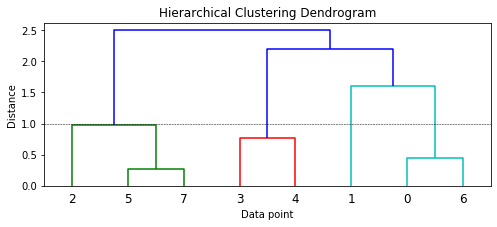

In [75]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)
# can see how each data point starts as an individual cluster and is slowly
# merged with other data points to form clusters.

In [79]:
# the model has correctly identified three major clusters
# if you consider a distance metric of around 1.0 or above (denoted by the dotted line)
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)
# Clustering our documents into groups with hierarchical clustering
# This should give you a good idea of how our TF-IDF features were leveraged to build our similarity
# features, which in turn helped in clustering our documents.

,Document,Category,ClusterLabel
0,Ο ουρανός είναι γαλάζιος και όμορφος.,weather,3
1,Αγάπησε αυτόν τον γαλάζιο και όμορφο ουρανό!,weather,4
2,Η γρήγορη καφέ αλεπού πηδάει πάνω από το τεμπέλικο σκυλί.,animals,1
3,"Ένα βασιλικό πρωινό γεύμα έχει λουκάνικα, μπέικον, αυγά, τοστ και φασόλια",food,2
4,"Λατρεύω τα πράσινα αυγά, λουκάνικα, μπέικον και φασόλια!",food,2
5,Η καφέ αλεπού είναι γρήγορη και το μπλε σκυλί είναι τεμπέλικο!,animals,1
6,Ο ουρανός είναι πολύ γαλάζιος και ο ουρανός είναι πολύ όμορφος σήμερα,weather,3
7,Το σκυλί είναι τεμπέλικο αλλά η καφέ αλεπού είναι γρήγορη!,animals,1


# Topic Models
The idea of topic models revolves around the process of extracting key themes or concepts from a corpus of documents, which are represented as topics. 
Topic models are extremely useful in summarizing large corpus of text documents and extracting features from text data that capture latent patterns in the data.

Techniques: LSA and LDA.

Frameworks like Gensim or Scikit-Learn enable us to leverage the LDA model
for generating topics.

For the purpose of feature engineering, which is the intent of this
chapter, you need to remember that when LDA is applied to a document-term matrix
(TF-IDF or Bag of Words feature matrix), it is broken into two main components.

• A document-topic matrix, which would be the feature matrix we are
looking for.

• A topic-term matrix, which helps us look at potential topics in the
corpus.

In [80]:
# Let’s now leverage Scikit-Learn to get the document-topic matrix as follows. This can 
# be used as features for any subsequent modeling requirements.
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
features
# Document-topic feature matrix from our LDA model
# You can clearly see which documents contribute the most to which of the three topics in this output

,T1,T2,T3
0,0.066846,0.863462,0.069692
1,0.055927,0.888246,0.055826
2,0.037232,0.037210,0.925558
3,0.933053,0.033487,0.033460
4,0.904420,0.047807,0.047773
5,0.037165,0.038399,0.924437
6,0.033444,0.931890,0.034666
7,0.037165,0.038399,0.924437


## Show topics and their weights

In [81]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6] # threshold
    print(topic)
    print()

# Choosing the number of topics for
# topic modeling is an entire technique of its own and is an art as well as a science
# There are various methods and heuristics to get the optimal number of topics,

[('αυγά', 2.3328511782466443), ('λουκάνικο', 2.3328511782466443), ('μπέικον', 2.3328511782466443), ('φασόλια', 2.3328511782466443), ('έχω', 1.3329268519581845), ('βασιλικό', 1.3329268519581845), ('γεύμα', 1.3329268519581845), ('πρωινό', 1.3329268519581845), ('τοστ', 1.3329268519581845), ('λατρεύω', 1.3327187893054886), ('πράσινος', 1.3327187893054886)]

[('ουρανός', 3.3326538451430383), ('όμορφος', 3.332535873098825), ('είναι', 3.3284883892294848), ('πολύ', 2.332850946504562), ('γαλάζιος', 2.3325312050554405), ('σήμερα', 1.3328226365341282), ('αγάπησε', 1.3324393623794024), ('αυτόν', 1.3324393623794024), ('γαλάζιο', 1.3324393623794024), ('ουρανό', 1.3324393623794024)]

[('είναι', 4.337460939091349), ('αλεπός', 3.3326376910845434), ('γρήγορη', 3.3326376910845434), ('καφέ', 3.3326376910845434), ('σκυλί', 3.3326376910845434), ('τεμπέλικος', 3.3326376910845434), ('από', 1.3326038212623283), ('πάνω', 1.3326038212623283), ('πηδάω', 1.3326038212623283), ('αλλά', 1.3325673860112233), ('μπλε', 

## Clustering documents using topic model features

In [82]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,Ο ουρανός είναι γαλάζιος και όμορφος.,weather,2
1,Αγάπησε αυτόν τον γαλάζιο και όμορφο ουρανό!,weather,2
2,Η γρήγορη καφέ αλεπού πηδάει πάνω από το τεμπέλικο σκυλί.,animals,1
3,"Ένα βασιλικό πρωινό γεύμα έχει λουκάνικα, μπέικον, αυγά, τοστ και φασόλια",food,0
4,"Λατρεύω τα πράσινα αυγά, λουκάνικα, μπέικον και φασόλια!",food,0
5,Η καφέ αλεπού είναι γρήγορη και το μπλε σκυλί είναι τεμπέλικο!,animals,1
6,Ο ουρανός είναι πολύ γαλάζιος και ο ουρανός είναι πολύ όμορφος σήμερα,weather,2
7,Το σκυλί είναι τεμπέλικο αλλά η καφέ αλεπού είναι γρήγορη!,animals,1
